In [89]:
import numpy as np
import matplotlib.pyplot as plt

images = []

for i in range(2400):
    img = plt.imread("Train/" + str((i+1)) + ".jpg")
    pixels = []
    for j in range(28):
        for k in range(28):
            pixels.append(img[j,k])
    
    pixels.append(1)
    images.append(pixels)
    
images = np.asarray(images)
print(images.shape)

(2400, 785)


In [90]:
imagesT = np.transpose(images)
print(imagesT.shape)

(785, 2400)


In [91]:
test_images = []

for i in range(200):
    img = plt.imread("Test/" + str((i+1)) + ".jpg")
    pixels = []
    for j in range(28):
        for k in range(28):
            pixels.append(img[j,k])
    
    pixels.append(1)
    test_images.append(pixels)
    
test_images = np.asarray(test_images)
print(test_images.shape)

(200, 785)


In [92]:
test_imagesT = np.transpose(test_images)
print(test_imagesT.shape)

(785, 200)


In [93]:
labels = np.genfromtxt('Test/Test Labels.txt')
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9.
 9. 9. 9. 9. 9. 9. 9. 9.]


In [94]:
t = np.ones((2400,10))
t = np.negative(t)
for i in range(10):
    t[(i*240):((i+1)*240),i:(i+1)] = 1
    
print(t.shape)

(2400, 10)


In [95]:
w = np.zeros((785,10))
w[0:1,0:] = np.ones((1,10))
print(w.shape)
w0 = w[0:,0:1]
w1 = w[0:,1:2]
w2 = w[0:,2:3]
w3 = w[0:,3:4]
w4 = w[0:,4:5]
w5 = w[0:,5:6]
w6 = w[0:,6:7]
w7 = w[0:,7:8]
w8 = w[0:,8:9]
w9 = w[0:,9:10]

(785, 10)


In [96]:
wt = np.transpose(w)
print(wt.shape)
wt0 = wt[0:1,0:]
wt1 = wt[1:2,0:]
wt2 = wt[2:3,0:]
wt3 = wt[3:4,0:]
wt4 = wt[4:5,0:]
wt5 = wt[5:6,0:]
wt6 = wt[6:7,0:]
wt7 = wt[7:8,0:]
wt8 = wt[8:9,0:]
wt9 = wt[9:10,0:]

(10, 785)


In [97]:
n = []
n.append(1)
n.append(0.1)
n.append(0.01)
n.append(0.001)
n.append(0.0001)
n.append(0.00001)
n.append(0.000001)
n.append(0.0000001)
n.append(0.00000001)
n.append(0.000000001)

n = np.asarray(n)

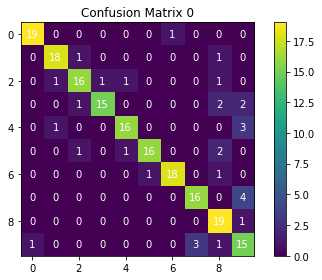

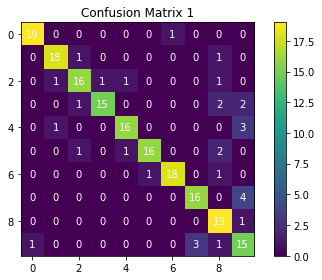

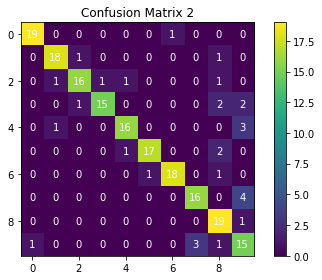

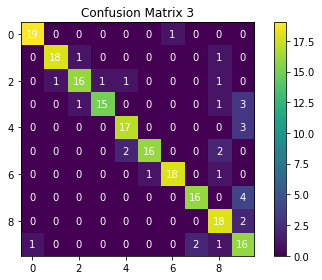

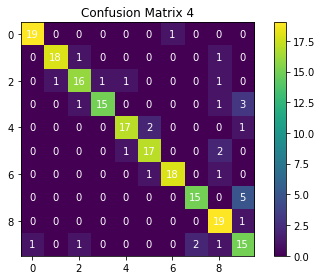

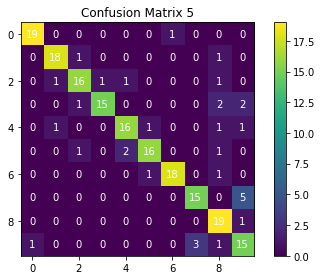

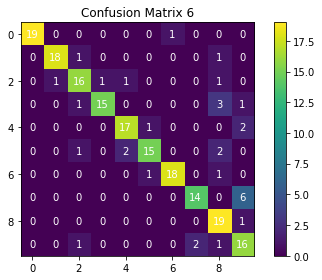

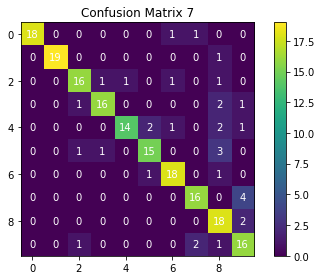

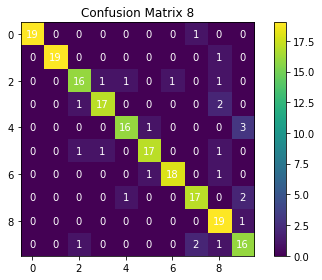

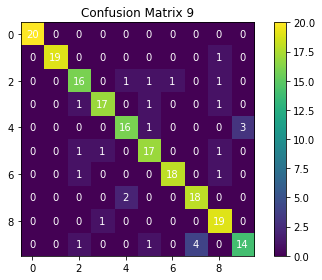

In [99]:
for n_counter in range(10):
    w_new = list(w)
    wt_new = list(wt)
    w_new = np.asarray(w_new)
    wt_new = np.asarray(wt_new)
    for w_counter in range(10):
        for limit in range(500):
            no_error = True
            for image_counter in range(2400):
                train_value = (wt_new[w_counter:w_counter+1,0:].dot(imagesT[0:,image_counter:image_counter+1])).dot(t[image_counter:image_counter+1,w_counter:w_counter+1])
                if train_value < 0:
                    w_new[0:,w_counter:w_counter+1] = w_new[0:,w_counter:w_counter+1] + n[n_counter] * (imagesT[0:,image_counter:image_counter+1]).dot(t[image_counter:image_counter+1,w_counter:w_counter+1])
                    wt_new = np.transpose(w_new)
                    no_error = False
            if no_error == True:
                break
                
    y = wt_new.dot(test_imagesT)
    cm = np.zeros((10,10))

    for i in range(200):
        predict = int(np.where(y == np.amax(y[0:,i:i+1]))[0][0])
        label = int(labels[i])
        cm[label:label+1, predict:predict+1] += 1

    plt.figure()
    plt.imshow(cm)
    plt.title("Confusion Matrix "+str(n_counter))
    plt.colorbar()
    plt.tight_layout()

    for i in range(10):
        for j in range(10):
            plt.text(j, i, int(cm[i, j]), ha="center", va="center", color="w")

    plt.savefig('Confusion-'+str(n_counter)+'.jpg')